## Use da_rnn_from_csv.py

In [2]:
import sys,os
import pandas as pd
import da_rnn_from_csv as drfc

### Run the model

2019-01-04 15:05:00,599 - VOC_TOPICS - INFO - Shape of data: (40000, 82).
Missing in data: 0.
2019-01-04 15:05:00,617 - VOC_TOPICS - INFO - Training size: 28000.
2019-01-04 15:05:00,618 - VOC_TOPICS - INFO - Is CUDA available? False.
2019-01-04 15:05:00,618 - VOC_TOPICS - INFO - Iterations per epoch: 219.


['AAL' 'AAPL' 'ADBE' 'ADI' 'ADP' 'ADSK' 'AKAM' 'ALXN' 'AMAT' 'AMGN' 'AMZN'
 'ATVI' 'AVGO' 'BBBY' 'BIDU' 'BIIB' 'CA' 'CELG' 'CERN' 'CMCSA' 'COST'
 'CSCO' 'CSX' 'CTRP' 'CTSH' 'DISCA' 'DISH' 'DLTR' 'EA' 'EBAY' 'ESRX'
 'EXPE' 'FAST' 'FB' 'FOX' 'FOXA' 'GILD' 'GOOGL' 'INTC' 'JD' 'KHC' 'LBTYA'
 'LBTYK' 'LRCX' 'MAR' 'MAT' 'MCHP' 'MDLZ' 'MSFT' 'MU' 'MXIM' 'MYL' 'NCLH'
 'NFLX' 'NTAP' 'NVDA' 'NXPI' 'PAYX' 'PCAR' 'PYPL' 'QCOM' 'QVCA' 'ROST'
 'SBUX' 'SIRI' 'STX' 'SWKS' 'SYMC' 'TMUS' 'TRIP' 'TSCO' 'TSLA' 'TXN'
 'VIAB' 'VOD' 'VRTX' 'WBA' 'WDC' 'WFM' 'XLNX' 'YHOO' 'NDX'] (40560, 82)


/Users/bperlman1/Documents/billybyte/pyliverisk/jupyter_notebooks/da_rnn/da_rnn_from_csv.py:143: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  attn_weights = F.softmax(softmax_input) # torch tensor dimensions = [batch_size * input_size] andattn weights with values sum up to 1.
/Users/bperlman1/Documents/billybyte/pyliverisk/jupyter_notebooks/da_rnn/da_rnn_from_csv.py:198: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  )).view(-1, self.T - 1)) # batch_size * T - 1, row sum up to 1
/Users/bperlman1/Documents/billybyte/pyliverisk/jupyter_notebooks/da_rnn/da_rnn_from_csv.py:338: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return loss.data[0]
2019-01-04 15:05:40,857 - VOC_TOPICS - INFO - Epoch 0, loss: 1926.071.


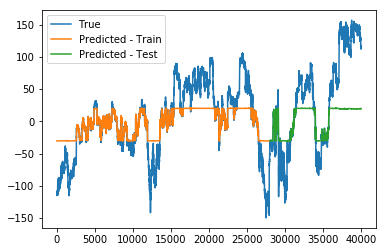

2019-01-04 15:12:25,600 - VOC_TOPICS - INFO - Epoch 10, loss: 11.608.


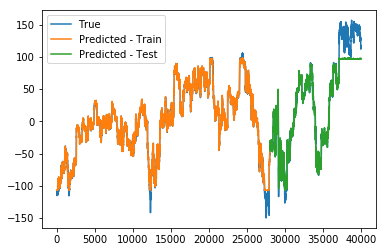

2019-01-04 15:19:03,615 - VOC_TOPICS - INFO - Epoch 20, loss: 5.877.


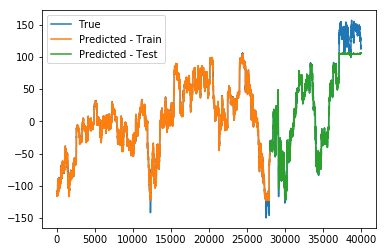

2019-01-04 15:25:51,189 - VOC_TOPICS - INFO - Epoch 30, loss: 5.075.


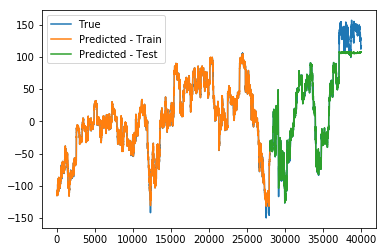

2019-01-04 15:32:36,277 - VOC_TOPICS - INFO - Epoch 40, loss: 5.006.


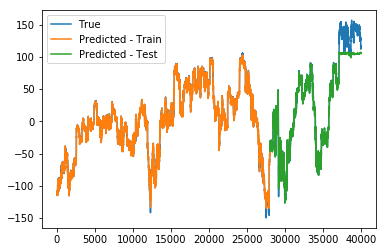

2019-01-04 15:39:23,825 - VOC_TOPICS - INFO - Epoch 50, loss: 4.948.


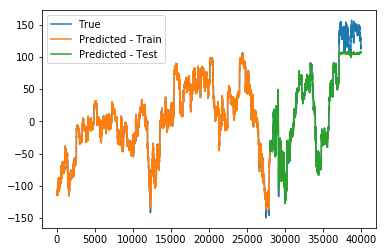

2019-01-04 15:46:02,480 - VOC_TOPICS - INFO - Epoch 60, loss: 4.923.


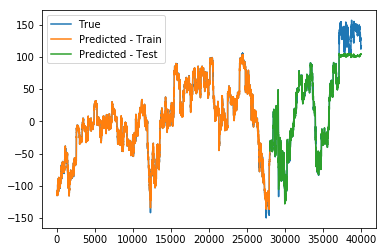

2019-01-04 15:52:40,508 - VOC_TOPICS - INFO - Epoch 70, loss: 4.897.


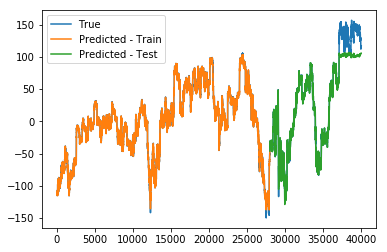

2019-01-04 15:59:30,619 - VOC_TOPICS - INFO - Epoch 80, loss: 4.884.


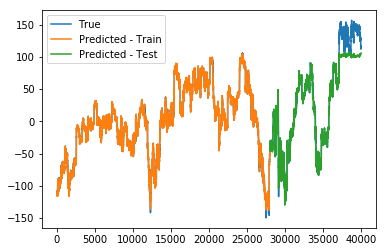

2019-01-04 16:06:11,584 - VOC_TOPICS - INFO - Epoch 90, loss: 4.870.


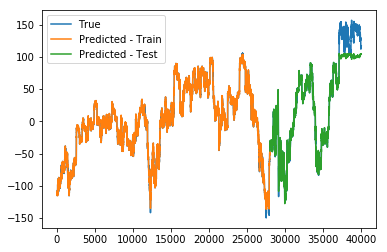

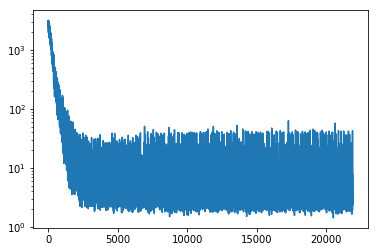

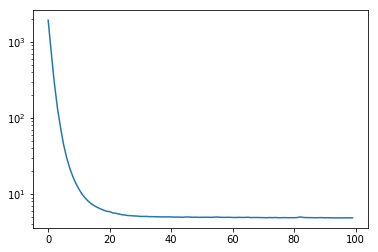

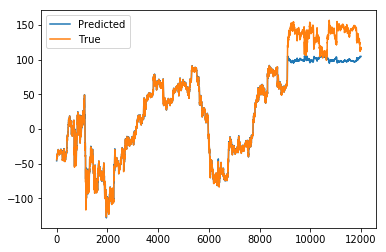

mean predicted price from pred_df: 26.086532, mean predicted price from model.predict: 26.029084


In [6]:
fname_no_ext = 'nasdaq100_padding'
rows_to_use = 40000
return_dict = drfc.main(FILE_NAME_NO_EXTENSION=fname_no_ext,subset_rows=rows_to_use)
df_partial = return_dict['dataframe']
m = return_dict['model']


### What does the model return?

In [11]:
print(f'The model returns a dictionary with keys {list(return_dict.keys())}')

The model returns a dictionary with keys ['model', 'dataframe', 'y_pred', 'test_size']


### Plot a sub-section of the output to zoom in on the differences between y_act and y_pred

12000 12000 12000


/Users/bperlman1/Virtualenvs3/pyliverisk/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


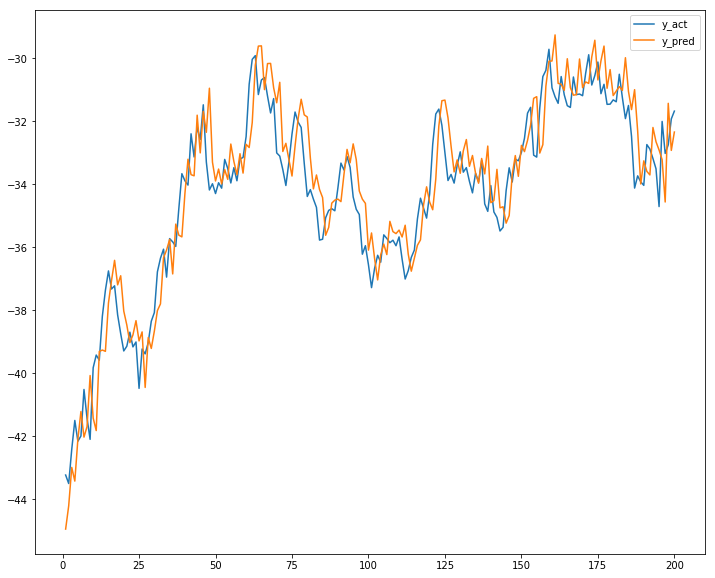

In [9]:
test_size = return_dict['test_size']
y_act = m.y[-1*test_size:]
y_pred = return_dict['y_pred'][-1 * test_size:]
print(test_size,len(y_act),len(y_pred))
df_review = pd.DataFrame({'y_act':y_act,'y_pred':y_pred})

num_to_view = 200

beg_index = 1
end_index = beg_index+num_to_view
df_review.iloc[beg_index:end_index].plot(y=['y_act','y_pred'],figsize=(12,10))